In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
%matplotlib inline

In [14]:
# path to data folder
data_path = "/home/jp_capo_98/Documents/ML-Silent-Speech-Recognition/Data/images/"
data_channels = ["ch1", "ch2", "ch3", "ch4"]

In [20]:
# import filenames and labels
data = {"label":[], "ch1":[], "ch2":[], "ch3":[], "ch4":[]}
for folder in os.listdir(data_path):
    for file in os.listdir(data_path + folder + "/" + data_channels[0]):
        data["label"].append(folder)
        data["ch1"].append(data_path + folder + "/" + data_channels[0] + "/" + file)
        data["ch2"].append(data_path + folder + "/" + data_channels[1] + "/" + file)
        data["ch3"].append(data_path + folder + "/" + data_channels[2] + "/" + file)
        data["ch4"].append(data_path + folder + "/" + data_channels[3] + "/" + file)

In [21]:
# convert to dataframe for easier visualization
data_df = pd.DataFrame(data)

In [24]:
# sample data
data_df.sample(4)

,ch1,ch2,ch3,ch4,label
452,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
935,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
1241,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
1483,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two


In [26]:
# describe the data
data_df.groupby("label").describe()

ch1                                                                 \
      count unique                                                top freq   
label                                                                        
one    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   
two    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   

        ch2                                                                 \
      count unique                                                top freq   
label                                                                        
one    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   
two    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   

        ch3                                                                 \
      count unique                                                top freq   
label                                                                        
one    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   
two    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   

        ch4                                                                 
      count unique                                                top freq  
label                                                                       
one    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1  
two    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1

In [27]:
# one hot encoding dictionary
one_hot_encoding = {"one":[1, 0],
                   "two":[0, 1]}

In [29]:
# one hot decoding dictionary for argmax
one_hot_decoding = {0:"one",
                   1:"two"}

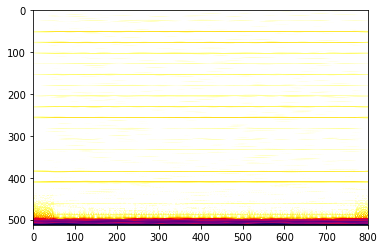

In [81]:
# Show one of the train spectograms
sample = data_df.sample()
plt.imshow(skimage.io.imread(sample.ch4.iloc[0]))

In [82]:
# Show sample label
sample.label.iloc[0]

'two'

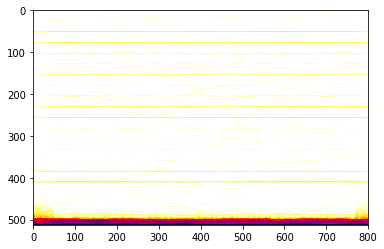

In [83]:
# Show one of the train spectograms
sample = data_df.sample()
plt.imshow(skimage.io.imread(sample.ch4.iloc[0]))

In [84]:
# Show sample label
sample.label.iloc[0]

'one'

In [48]:
# get shape
skimage.io.imread(sample.ch1.iloc[0]).shape

(513, 800, 3)

In [50]:
# shufle data frame to make diferent datasets
shuffled_df = data_df.sample(frac=1).reset_index(drop=True)
shuffled_df.head()

,ch1,ch2,ch3,ch4,label
0,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
1,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
2,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
3,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
4,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one


In [51]:
shuffled_df.shape

(2034, 5)

### Separating data
- train = 80%
- validation = 10%
- test = 10%

In [60]:
# training data
train_data_labels = shuffled_df.label.values[:1628]
train_data_ch1 = shuffled_df.ch1.values[:1628]
train_data_ch2 = shuffled_df.ch2.values[:1628]
train_data_ch3 = shuffled_df.ch3.values[:1628]
train_data_ch4 = shuffled_df.ch4.values[:1628]

In [61]:
# validation data
validation_data_labels = shuffled_df.label.values[1628:1832]
validation_data_ch1 = shuffled_df.ch1.values[1628:1832]
validation_data_ch2 = shuffled_df.ch2.values[1628:1832]
validation_data_ch3 = shuffled_df.ch3.values[1628:1832]
validation_data_ch4 = shuffled_df.ch4.values[1628:1832]

In [62]:
# test data 
test_data_labels = shuffled_df.label.values[1832:]
test_data_ch1 = shuffled_df.ch1.values[1832:]
test_data_ch2 = shuffled_df.ch2.values[1832:]
test_data_ch3 = shuffled_df.ch3.values[1832:]
test_data_ch4 = shuffled_df.ch4.values[1832:]

### Helper functions

In [67]:
# weight initialization helper function
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return(tf.Variable(init_random_dist))

In [68]:
# bias initialization function
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,  shape=shape)
    return (tf.Variable(init_bias_vals))

In [69]:
# 2d convolutional layer
def conv2d(x, W):
    return (tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="SAME"))

In [70]:
# max pool layer
def max_pool_2by2(x):
    return (tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME"))

In [71]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return (tf.nn.relu(conv2d(input_x, W)+b))

In [72]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.nn.relu(tf.matmul(input_layer, W)+b))

In [73]:
def output_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.matmul(input_layer, W)+b)

## GRAPH

### Placeholders

In [ ]:
with tf.name_scope("Inputs"):
    # getting array of string which will be getting the images
    x = tf.placeholder(tf.float32, shape=[None, 160, 160, 3], name="images")
    # gettin the one hot labels
    y_true = tf.placeholder(tf.float32, shape=[None, 12], name="labels")
    # getting hold probability value
    hold_prob = tf.placeholder(tf.float32)
    # is training running?
    is_train = tf.placeholder(tf.bool)

### Datasets

In [77]:
### image parsing fn
def _image_parse_fn(label, filename):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_png(image_string)
    image_resized = tf.image.resize_images(image_decoded, [160, 160])
    image_resized = tf.div(image_resized, 255)
    return image_resized, label

In [80]:
### Datasets
with tf.name_scope("Datasets"):
    # Train Datasets
    with tf.name_scope("Train_Dataset"):
        train_dataset = tf.data.Dataset.from_tensor_slices((train_data_labels,
                                                           train_data_ch1,
                                                           train_data_ch2,
                                                           train_data_ch3,
                                                           train_data_ch4))
        train_dataset = train_dataset.shuffle(3000)
        train_dataset = train_dataset.repeat()
        train_dataset = train_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        train_dataset = train_dataset.batch(batch_size)
        
        

NameError: name 'num_par_calls' is not defined